In [297]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle
import re
from IPython.display import display
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import Javascript

def find(target, myList):
    for i in range(len(myList)):
        if myList[i] == target:
            return i       

def on_click(change):
    #display(Javascript('IPython.notebook.execute_cells_below()'))  
    display(Javascript('IPython.notebook.execute_cell_range(IPython.notebook.get_selected_index()+1, IPython.notebook.ncells())'))

# Function to plot error boxes
def makeErrorBoxes(xdata,ydata,xerror,yerror,fc='None',ec='k',alpha=1.0,lw=1):
    # Create list for all the error patches
    errorboxes = []

    # Loop over data points; create box from errors at each point
    for xc,yc,xe,ye in zip(xdata,ydata,xerror.T,yerror.T):
        rect = Rectangle((xc-xe[0],yc-ye[0]),xe.sum(),ye.sum())
        errorboxes.append(rect)

    # Create patch collection with specified colour/alpha
    pc = PatchCollection(errorboxes,facecolor=fc,alpha=alpha,edgecolor=ec,linewidth=lw)

    # Add collection to axes
    ax.add_collection(pc)    

def detector_colors(di):
    #colors_list = ['b','g','r','c','m','y'] # Python 3 old default
    #colors_list = ['#b2182b','#d6604d','#f4a582','#92c5de','#4393c3','#2166ac'] # blue to red cold
    #colors_list = ['#d73027','#f46d43','#fdae61','#abd9e9','#74add1','#4575b4'] # blue to red warm
    #colors_list = ['#762a83','#9970ab','#c2a5cf','#a6dba0','#5aae61','#1b7837'] # purple to green
    #colors_list = ['#40004b','#762a83','#9970ab','#5aae61','#1b7837','#00441b'] # purple to green darker
    #colors_list = ["#afa83a","#7f63b8","#56ae6c","#b84c7d","#ac863f","#b94d3d"] # iWantHue 1
    #colors_list = ['#1b9e77','#d95f02','#7570b3','#e7298a','#66a61e','#e6ab02'] # qualitative dark 1
    colors_list = ['#e41a1c','#377eb8','#4daf4a','#984ea3','#ff7f00','#a65628'] # qualitative dark 2
    return colors_list[di]
    
data_version = 'v7'

metadata_file = 'metadata_matrix_' + data_version + '.npy'
mm_metadata = np.load(metadata_file) # data set, ion species, ion energy, target material, target thickness, secondary particle, detector, header meta data
exists_file = 'exists_matrix_' + data_version + '.npy'
mm_exists = np.load(exists_file) # data set, ion species, ion energy, target material, target thickness, secondary particle, detector

#values_file = 'values_matrix_' + data_version + '.npy'
#mm_values = np.load(values_file) # data set, ion species, ion energy, target material, target thickness, secondary particle, detector, column values, energy bins

#print(mm_metadata[0,0,0,0,0,0,0,0])

projectile_sym_str = ['H', 'He', 'C', 'Si', 'Fe']
projectile_longnames_str = ['Hydrogen', 'Helium', 'Carbon', 'Silicon', 'Iron']

mm_values_names_list = []
for i in range(5):
    mm_values_names_list.append('values_matrix_' + projectile_sym_str[i].lower() + "_" + data_version + '.npy')

is_label = widgets.Label(value="Select projectile ion species.")
    
ion_species = widgets.ToggleButtons(
    options=projectile_sym_str,
    description='Ion:',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltips=projectile_longnames_str,
#     icons=['check'] * 5
)

ion_species.observe(on_click, 'value')
display(is_label,ion_species)


Label(value='Select projectile ion species.')

ToggleButtons(description='Ion:', options=('H', 'He', 'C', 'Si', 'Fe'), tooltips=['Hydrogen', 'Helium', 'Carbon', 'Silicon', 'Iron'], value='H')

<IPython.core.display.Javascript object>

In [298]:
isi = find(ion_species.value,projectile_sym_str)
mm_values = np.load(mm_values_names_list[isi])

def erg_options(isi):
    if isi == 0:
        proj_E = ['400 MeV','800 MeV','2500 MeV']
    else:
        proj_E = ['400 MeV/n','800 MeV/n','1500 MeV/n']
    return proj_E

Projectile_E_tooltips = ['lowest energy','middle energy', 'highest energy']

ie_label = widgets.Label(value="Select projectile ion energy.")

ion_energy = widgets.ToggleButtons(
    options=erg_options(isi),
    description='Energy:',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltips=Projectile_E_tooltips,
#     icons=['check'] * 5
)

ion_energy.observe(on_click, 'value')
display(ie_label, ion_energy)


Label(value='Select projectile ion energy.')

ToggleButtons(description='Energy:', options=('400 MeV/n', '800 MeV/n', '1500 MeV/n'), tooltips=['lowest energy', 'middle energy', 'highest energy'], value='400 MeV/n')

<IPython.core.display.Javascript object>

In [307]:
iei = find(ion_energy.value,erg_options(isi))

target_mats_long = ['Aluminum','Polyethylene','Combination of Al and HDPE']
target_mats_short = ['Al','HDPE','AlPE']

tm_label = widgets.Label(value="Select upstream target material.")

target_material = widgets.ToggleButtons(
    options=target_mats_short,
    description='Material:',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltips=target_mats_long,
#     icons=['check'] * 3
)

target_material.observe(on_click, 'value')
display(tm_label, target_material)

Label(value='Select upstream target material.')

ToggleButtons(description='Material:', options=('Al', 'HDPE', 'AlPE'), tooltips=['Aluminum', 'Polyethylene', 'Combination of Al and HDPE'], value='Al')

<IPython.core.display.Javascript object>

In [315]:
ftmi = find(target_material.value,target_mats_short)
thicknesses = ['20 g/cm\u00B2','40 g/cm\u00B2','60 g/cm\u00B2']
def thickness_options(ftmi):
    if ftmi == 2:
        thicknesses = ['20 g/cm\u00B2','60 g/cm\u00B2']
    else:
        thicknesses = ['20 g/cm\u00B2','40 g/cm\u00B2','60 g/cm\u00B2']
    return thicknesses

tt_label = widgets.Label(value="Select upstream target mass thickness.")

target_thickness = widgets.ToggleButtons(
    options=thickness_options(ftmi),
    description='Thickness:',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltips=thickness_options(ftmi),
#     icons=['check'] * 3
)

target_thickness.observe(on_click, 'value')
display(tt_label, target_thickness)

Label(value='Select upstream target mass thickness.')

ToggleButtons(description='Thickness:', options=('20 g/cm²', '40 g/cm²', '60 g/cm²'), tooltips=['20 g/cm²', '40 g/cm²', '60 g/cm²'], value='20 g/cm²')

In [316]:
ftti = find(target_thickness.value,thicknesses)

detectors_short = ['OLS','NaI']
detectors_long = ['Organic Liquid Scintillator','Sodium Iodide']

dt_label = widgets.Label(value="Select a detector type.")

detector_type = widgets.ToggleButtons(
    options=detectors_short,
    description='Type:',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltips=detectors_long,
#     icons=['check'] * 3
)

detector_type.observe(on_click, 'value')
display(dt_label,detector_type)

Label(value='Select a detector type.')

ToggleButtons(description='Type:', options=('OLS', 'NaI'), tooltips=['Organic Liquid Scintillator', 'Sodium Iodide'], value='OLS')

In [317]:
detti = find(detector_type.value,detectors_short)
if detti==1: 
    add2deti = 6 # offset in matrix for NaI detectors
else:
    add2deti = 0 

# See which secondary particles exist
existing_pars_i = []
for i in range(np.shape(mm_exists[0,isi,iei,ftmi,ftti,:,add2deti:(add2deti+6)])[0]):
    if np.any(mm_exists[0,isi,iei,ftmi,ftti,i,add2deti:(add2deti+6)]):
        existing_pars_i.append(i)
        
particles_long = ['Neutron','Back Target Neutron','Proton','Deuteron','Triton','Helium-3','Helium-4'] # second 'Neutron' can be renamed to specify deconvoluted origin
particles_short = ['N','NDC','H','D','T','S','A']
particles_med = ['N','NDC','P (\u00B9H)','D (\u00B2H)','T (\u00B3H)','S (\u00B3He)','A (\u2074He)']

present_pars_long = [particles_long[i] for i in existing_pars_i]
present_pars_med = [particles_med[i] for i in existing_pars_i]

sp_label = widgets.Label(value="Select which secondary particle to plot spectra for.")

secondary_particle = widgets.ToggleButtons(
    options=present_pars_med,
    description='Type:',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltips=present_pars_long,
#     icons=['check'] * 3
)

secondary_particle.observe(on_click, 'value')
display(sp_label,secondary_particle)


Label(value='Select which secondary particle to plot spectra for.')

ToggleButtons(description='Type:', options=('N', 'NDC'), tooltips=['Neutron', 'Back Target Neutron'], value='N')

In [318]:
spi = find(secondary_particle.value,particles_med)

detectors_angles = [['10\u00B0','30\u00B0','45\u00B0','60\u00B0','80\u00B0','135\u00B0'], ['7.2\u00B0','10\u00B0','12.7\u00B0','28.2\u00B0','30\u00B0','32.7\u00B0']]
available_det_angles = []

da_label = widgets.Label(value="Select the detector angles to plot.")

dets = []
for i in range(6):
    if mm_exists[0,isi,iei,ftmi,ftti,spi,(add2deti+i)]:
        available_det_angles.append(detectors_angles[detti][i])
        dets.append(widgets.Checkbox(
            value=True,
            description=detectors_angles[detti][i],
            disabled=False
        ))

display(da_label)
for i in range(6):
    if mm_exists[0,isi,iei,ftmi,ftti,spi,(add2deti+i)]:
        display(dets[i])

Label(value='Select the detector angles to plot.')

Checkbox(value=True, description='10°')

Checkbox(value=True, description='30°')

Checkbox(value=True, description='45°')

Checkbox(value=True, description='60°')

Checkbox(value=True, description='80°')

Checkbox(value=True, description='135°')

In [319]:
det_angle_i_list = []
for i in range(len(available_det_angles)):
    if dets[i].value:
        if detti == 0:
            det_angle_i_list.append(find(available_det_angles[i],detectors_angles[detti]))
        else:
            det_angle_i_list.append(find(available_det_angles[i],detectors_angles[detti])+6) # for NaI

ds_label = widgets.Label(value='Select which sets of data to display.')            

data_set_names = ['Experiment','MCNP simulated','PHITS simulated']
data_sets = []
for i in range(3):
    data_sets.append(widgets.Checkbox(
        value=True,
        description=data_set_names[i],
        disabled=False
    ))

display(ds_label)
for i in range(3):
    display(data_sets[i])



Label(value='Select which sets of data to display.')

Checkbox(value=True, description='Experiment')

Checkbox(value=True, description='MCNP simulated')

Checkbox(value=True, description='PHITS simulated')

In [332]:
data_set_i_list = []
for i in range(3):
    if data_sets[i].value:
        data_set_i_list.append(i)

spacing_short = ['Nada','Spaced by 10\u00B2']
spacing_long = ['All values are presented as is.','Plots for different detectors are multiplied by powers of 10\u00B2 for easier viewing.']

spacing_label = widgets.Label(value='Select how data sets for each detector should be spaced apart (if at all).')  

spacing_choice = widgets.ToggleButtons(
    options=spacing_short,
    description='Spacing:',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltips=spacing_long,
#     icons=['check'] * 3
)

spacing_choice.observe(on_click, 'value')
display(spacing_label, spacing_choice)

Label(value='Select how data sets for each detector should be spaced apart (if at all).')

ToggleButtons(description='Spacing:', options=('Nada', 'Spaced by 10²'), tooltips=['All values are presented as is.', 'Plots for different detectors are multiplied by powers of 10² for easier viewing.'], value='Nada')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


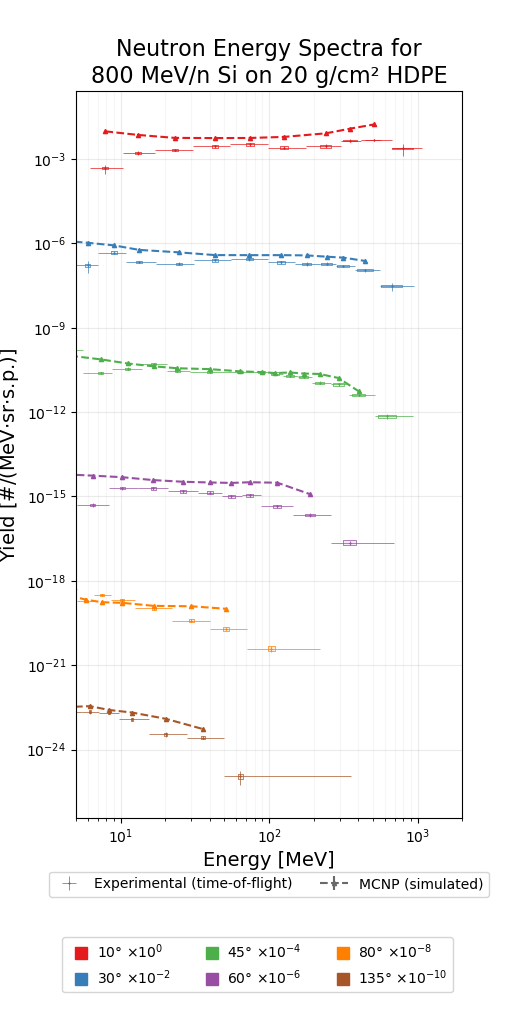

In [349]:
spacing_condition = find(spacing_choice.value,spacing_short)
if spacing_condition == 0:
    mult_factor_base = 1
else:
    mult_factor_base = 100

fst = 16
fs = 14
beam_energy_text = erg_options(isi)[iei]
beam_species_text = projectile_sym_str[isi]

fig = plt.figure()
ax = plt.subplot(111)
# Axis labels
title_text = particles_long[spi] + " Energy Spectra for" + "\n" 
title_text += beam_energy_text +" "+ beam_species_text + " on "+ thicknesses[ftti] +" "+ target_mats_short[ftmi] 
plt.title(title_text,fontsize=fst)
if spi <= 2:
    plt.xlabel("Energy [MeV]",fontsize=fs)
else:
    plt.xlabel("Energy [MeV/n]",fontsize=fs)

if spi == 1: # deconvoluted neutrons
    leg_strings = [r'Experimental (deconvoluted)',r'MCNP (simulated)', r'PHITS (simulated)']
    plt.ylabel(r"Yield [#$\cdot$/(MeV$\cdot$s.p.)]",fontsize=fs)
else:
    leg_strings = [r'Experimental (time-of-flight)',r'MCNP (simulated)', r'PHITS (simulated)']
    if spi <= 2:
        plt.ylabel(r"Yield [#/(MeV$\cdot$sr$\cdot$s.p.)]",fontsize=fs)
    else:
        plt.ylabel(r"Yield [#/(MeV/n$\cdot$sr$\cdot$s.p.)]",fontsize=fs)

# Generate portion of legend specifying data sets
if spi == 1:
    exp_leg, = plt.errorbar(np.NaN, np.NaN,yerr=0, color='dimgrey', marker=".",markersize=3,linestyle=":",alpha=1.0), #, label=r'Deconvolued')
else:
    exp_leg,  = plt.errorbar(np.NaN, np.NaN,xerr=0,yerr=0,marker=".",c='dimgrey',markersize=2,linestyle="",elinewidth=0.5,markeredgewidth=0.5,capsize=0), # , label=r'Experimental (ToF)') 

MCNP_leg, = plt.errorbar(np.NaN, np.NaN,yerr=0, color='dimgrey', marker="^",markersize=3,linestyle="--"), #, label=r'Simulated (MCNP)')
PHITS_leg, = plt.errorbar(np.NaN, np.NaN,yerr=0, color='dimgrey', marker="s",markersize=3,linestyle="--"), #, label=r'Simulated (PHITS)')

legs_for_ds = [exp_leg, MCNP_leg, PHITS_leg]
used_ds_legs = []
used_ds_leg_strs = []
leg_handles1 = []
leg_labels1 = []
    
for dsi in data_set_i_list:
    used_ds_legs.append(legs_for_ds[dsi])
    used_ds_leg_strs.append(leg_strings[dsi])
    k=5
    for di in det_angle_i_list:
        ndet = str(di+1)
        scale_power = 2*((len(det_angle_i_list)-1)-k)
        mult_factor = mult_factor_base**scale_power
        if spacing_condition == 0:
            lab_text = detectors_angles[detti][di]
        else:
            lab_text = detectors_angles[detti][di] + r" $\times10^{{{0}}}$".format(str(int(scale_power)))
        k += 1
        
        # Make artificial legend for 6 detectors
        ebp = ax.plot(np.NaN, np.NaN,c=detector_colors(di),marker="s",markersize=8,linestyle="") #,label=lab_text) #,label='Simulated (MCNP)')
        leg_handles1.append(ebp[0])
        leg_labels1.append(lab_text)
        
        nzi = np.nonzero(mm_values[dsi,iei,ftmi,ftti,spi,di,1,:])
        xdata = mm_values[dsi,iei,ftmi,ftti,spi,di,1,:][nzi]
        xbinw = [mm_values[dsi,iei,ftmi,ftti,spi,di,1,:][nzi]-mm_values[dsi,iei,ftmi,ftti,spi,di,0,:][nzi] , mm_values[dsi,iei,ftmi,ftti,spi,di,2,:][nzi]-mm_values[dsi,iei,ftmi,ftti,spi,di,1,:][nzi]]
        ydata = mm_values[dsi,iei,ftmi,ftti,spi,di,3,:][nzi]
        yerr_stat = mm_values[dsi,iei,ftmi,ftti,spi,di,4,:][nzi]
        yerr_sys = mm_values[dsi,iei,ftmi,ftti,spi,di,5,:][nzi]
        xerr = mm_values[dsi,iei,ftmi,ftti,spi,di,6,:][nzi]
        
        ydata = ydata*mult_factor
        yerr_stat = yerr_stat*mult_factor
        yerr_sys = yerr_sys*mult_factor
        
        # Generate plots
        if dsi == 0: # experimental results
            if spi == 1: # deconvoluted neutrons
                alpha_val=1.0
                marker_val = "."
                p = plt.errorbar(xdata,ydata,yerr=yerr,c=detector_colors(di),marker=marker_val,markersize=3,linestyle=":",alpha=alpha_val,label=lab_text) #,label='Simulated (MCNP)')
            else:
                # x error bar (bin width)
                xerrbar = xbinw
                # x error box (energy resolution
                xerrbox = xerr
                xerrbox = np.array([xerrbox, xerrbox])
                # y error bar (systematic uncertainty)
                yerrbar = [yerr_sys, yerr_sys]
                yerrbar[0][(ydata-yerrbar[0])<=0]=0 # get rid of negative error bars
                yerrbar[1][(ydata)<=0]=0 # get rid of errorbars on negative points
                # y error box (statistical uncertainty)
                yerrbox = np.array([yerr_stat, yerr_stat])
                
                p = plt.errorbar(xdata,ydata,xerr=xerrbar,yerr=yerrbar,marker=".",c=detector_colors(di),markersize=2,linestyle="",elinewidth=0.5,markeredgewidth=0.5,capsize=0,label=lab_text)
                nx_color = detector_colors(di) #p[0].get_color()
                makeErrorBoxes(xdata,ydata,xerrbox,yerrbox,fc='None',ec=nx_color,alpha=1.0,lw=0.5)
                makeErrorBoxes(xdata,ydata,xerrbox,yerrbox,fc=nx_color,ec='None',alpha=0.1,lw=0.5)
                
        elif dsi == 1: # MCNP results
            ebp = plt.errorbar(xdata,ydata,yerr=yerr_stat,c=detector_colors(di),marker="^",markersize=3,linestyle="--") #,label=lab_text) #,label='Simulated (MCNP)')
        
        elif dsi == 2: # PHITS results
            ebp = plt.errorbar(xdata,ydata,yerr=yerr_stat,c=detector_colors(di),marker="s",markersize=3,linestyle="--") #,label=lab_text) #,label='Simulated (MCNP)')
        
        
#handles, labels = ax.get_legend_handles_labels()
if len(data_set_i_list)==3: # Three rows in named legend
    box_h_multiplier = 0.92 # percentage of total height occupied by actual plot
    box_h_offset = 0.12 # vertical offset left at the bottom for legend stuff
    leg2_anchor = (0.5, -0.065)
    leg1_anchor = (0.47, -0.155)
elif len(data_set_i_list)==2: # Two rows of legend
    box_h_multiplier = 0.92 # percentage of total height occupied by actual plot
    box_h_offset = 0.12 # vertical offset left at the bottom for legend stuff
    leg2_anchor = (0.5, -0.065)
    leg1_anchor = (0.47, -0.155)
else: # One row of legend
    box_h_multiplier = 0.92 # percentage of total height occupied by actual plot
    box_h_offset = 0.12 # vertical offset left at the bottom for legend stuff
    leg2_anchor = (0.5, -0.065)
    leg1_anchor = (0.47, -0.155)

# Set size and location of the plot on the canvas
box = ax.get_position()
ax.set_position([box.x0 + box.width * 0.025, box.y0 + box.height * box_h_offset,box.width * 0.95, box.height * box_h_multiplier])

# Put a legend below current axis
legend2 = ax.legend(used_ds_legs,used_ds_leg_strs,loc='upper center', bbox_to_anchor=leg2_anchor, ncol=len(data_set_i_list))

# Put a legend below current axis
ax.legend(leg_handles1[:6],leg_labels1[:6],loc='upper center', bbox_to_anchor=leg1_anchor, ncol=3,handletextpad=0.1)
ax.add_artist(legend2)

window_title = mm_metadata[dsi,isi,iei,ftmi,ftti,spi,0,1] + "_fig"
fig.canvas.set_window_title(window_title)
if spacing_condition == 1: 
    fig.set_size_inches(5.25,10.25)
        
plt.xscale('log')
plt.yscale('log')
plt.grid(b=True, which='major', linestyle='-', alpha=0.25)
plt.grid(b=True, which='minor', linestyle='-', alpha=0.10)
plt.xlim([5,2000])
        
        
        
plt.show()        
        
    
    
